# Implementing k-means algorithm

k-means is a clustering algorithm, used in unsupervised learning.

## Imports

In [268]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

## k-means algorithm

In [265]:
"""
    euclidean-distance:
    defines the euclidean distance between two points with two dimensions
    x,y -> points represented as tuples with two dimensions
"""
def euclidean_distance(x, y):
    return round(math.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2), 3)

In [266]:
"""
    initialize_centroids:
    returns k unique random points from a sample data_points
    data_points -> a list of points
    k -> no of clusters
"""
def initialize_centroids(data_points, k):
    # k random points
    random_indices = random.sample(range(0, len(data_points)), k)
    random_points = [data_points[i] for i in random_indices]
    return random_points

In [272]:
"""
    k_means algorithm
    data_points -> a list of tuples with two co-ordinates
    k -> no of clusters
    n -> no of iterations to run
"""
def k_means(data_points, k, n):
    
    centroids = initialize_centroids(data_points, k) # get k random points as a list of tuples
    
    while n != 0: # run the alogrithm n times
        # find distance b/w centroids and other points
        distances = []
        for c in centroids:
            distances.append([euclidean_distance(c, data_points[j]) for j in range(0, len(data_points))])
        distances = list(zip(*distances))

        # group points into clusters based on their minimum distance to the centroids 
        clusters = {}
        for d in range(0, len(data_points)):
            if clusters.get(np.argmin(distances[d])) != None:
                clusters[np.argmin(distances[d])].append(data_points[d])
            else:
                clusters[np.argmin(distances[d])] = []
                clusters[np.argmin(distances[d])].append(data_points[d])

        # take the mean of points in each cluster and use them as new centroids
        new_centroids = []
        for key in clusters:
            values = clusters.get(key)
            new_centroids.append((np.mean([points[0] for points in values]), np.mean([points[1] for points in values])))
        centroids = new_centroids
        n-=1 # after one iteration decrement the iterations to run
    
    # return the clusters and the new_centroids
    return (new_centroids, clusters)

## k-means example

### Create Data

In [284]:
# Create a collection of 30 random points
x = [2, 3, 4, 5, 10, 11, 13, 14, 20, 21, 22, 23, 24]
y = [5, 6, 7, 8, 10, 11, 13, 14, 20, 21, 22, 23, 24]
data_points = list(zip(x, y))
print(data_points)

[(2, 5), (3, 6), (4, 7), (5, 8), (10, 10), (11, 11), (13, 13), (14, 14), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24)]


### Visualize Data

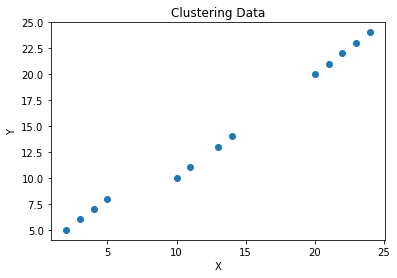

In [283]:
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering Data')
plt.show()

### Find Clusters

In [293]:
# Find out the centroids and clusters
k = 3
iterations = 10
centroids, clusters = k_means(data_points, k, iterations)
d = {i: centroids[i] for i in range(len(centroids))}

### Visualize Clusters

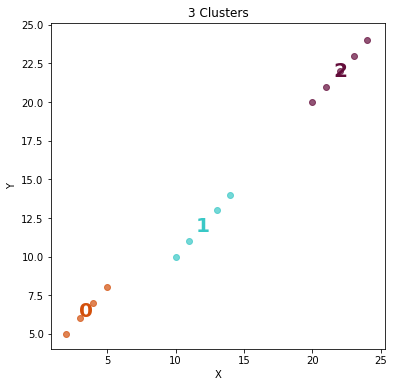

In [294]:
customPalette = ['#D3500C', '#39C8C6', '#630C3A', '#FFB139', '#405d27', '#034f84']
#create a new figure
plt.figure(figsize=(6,6))

#loop through labels and plot each cluster
for i, label in enumerate(d.keys()):
    for j in clusters[label]:
        #add data points 
        plt.scatter(x=j[0], 
                    y=j[1], 
                    color=customPalette[i], 
                    alpha=0.7)
    
    #add label
    plt.annotate(label, 
                 d[label],
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color=customPalette[i]) 
plt.xlabel('X')
plt.ylabel('Y')
plt.title('%d Clusters' % k)
print()